# Support Vector Machine

Support Vector Machines (SVMs) are supervised learning models primarily used for classification.

Imagine you have two distinct groups of data points plotted on a graph, and you want to draw a line (or a higher-dimensional equivalent) to separate them.

 SVMs aim to find the "best" line, which translates to a hyperplane in higher dimensions.





**Hyperplane:**

In a two-dimensional space, a hyperplane is simply a line.

In three-dimensional space, it's a plane.

In higher dimensions, it's a generalized plane.

The hyperplane is the decision boundary that separates the different classes of data. The goal of an SVM is to find the optimal hyperplane that best divides the data.


**Support Vectors:**

These are the data points that are closest to the hyperplane.

They are the most critical data points because they directly influence the position and orientation of the hyperplane.

If you were to remove any other data points, the hyperplane would likely remain the same. However, removing a support vector could significantly alter the hyperplane's position.
They "support" the creation of the maximum margin.



**Margin:**

The margin is the distance between the hyperplane and the nearest data points from each class (the support vectors).

The goal of an SVM is to maximize this margin.

 A larger margin generally leads to better generalization, meaning the model is more likely to perform well on unseen data.


**Kernel Trick:**
In many real-world scenarios, data is not linearly separable. This means that a straight line (or hyperplane) cannot perfectly separate the classes.
The kernel trick is a technique that allows SVMs to handle non-linearly separable data by implicitly mapping the data into a higher-dimensional space.
In this higher-dimensional space, it may be possible to find a hyperplane that separates the data.
Common kernel functions are **linear**, **polynomial**, and **radial basis function (RBF).**

In essence, SVMs work by finding the hyperplane that maximizes the margin between classes, using support vectors to define that margin, and employing the kernel trick to handle non-linear data.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
from sklearn.datasets import load_iris
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [129]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [130]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [131]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [132]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [133]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [134]:
df["target"]=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


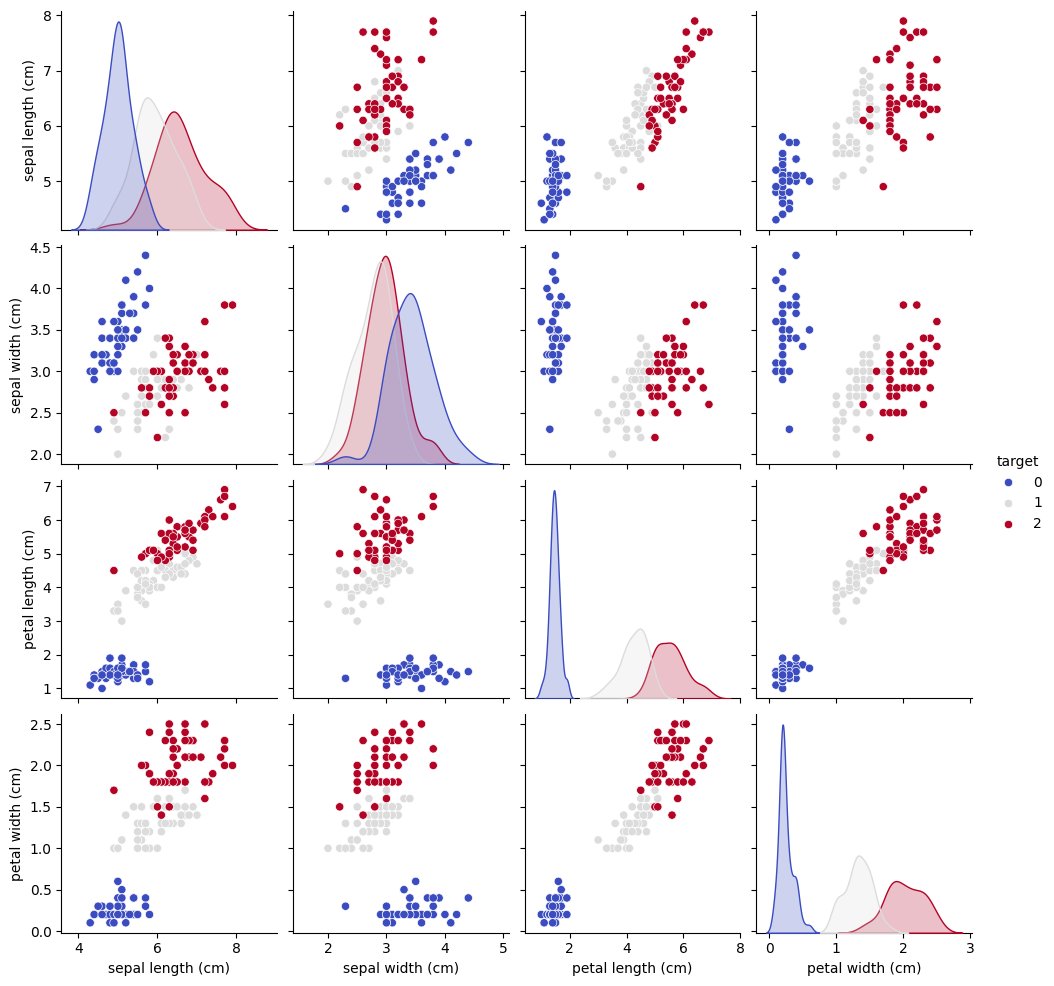

In [135]:
sns.pairplot(data=df,hue="target",palette="coolwarm")

In [136]:
x=df.drop("target",axis=1)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [137]:
y=df.target
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [139]:
from sklearn.svm import SVC
model=SVC(kernel="linear")
model.fit(x_train,y_train)

SVC(kernel='linear')

In [140]:
model.score(x,y)

0.9866666666666667

In [141]:
model.score(x_test,y_test)

1.0

In [142]:
iris.data[10]

array([5.4, 3.7, 1.5, 0.2])

In [143]:
iris.target[10]

0

In [144]:
model.predict([iris.data[10]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [145]:
df.shape

(150, 5)

In [146]:
iris.data.size

600

In [147]:
iris.target.size

150

In [148]:
predictions = []
for i in range(iris.target.size):
    pred = model.predict([iris.data[i]])
    predictions.append(pred[0])
df['prediction'] = predictions
df

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [149]:
df["equal"]= df["target"]==df["prediction"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction,equal
0,5.1,3.5,1.4,0.2,0,0,True
1,4.9,3.0,1.4,0.2,0,0,True
2,4.7,3.2,1.3,0.2,0,0,True
3,4.6,3.1,1.5,0.2,0,0,True
4,5.0,3.6,1.4,0.2,0,0,True
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,True
146,6.3,2.5,5.0,1.9,2,2,True
147,6.5,3.0,5.2,2.0,2,2,True
148,6.2,3.4,5.4,2.3,2,2,True


In [150]:
df["equal"].value_counts()

,count
equal,
True,148
False,2


In [151]:
df[df["equal"]==False]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction,equal
70,5.9,3.2,4.8,1.8,1,2,False
83,6.0,2.7,5.1,1.6,1,2,False


In [152]:
for i in df[df["equal"]==False].index:
    print(i)
    print("Predicted  value :",model.predict([iris.data[70]]))
    print("Actual value :",iris.target[i])

70
Predicted  value : [2]
Actual value : 1
83
Predicted  value : [2]
Actual value : 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [153]:
model.predict([iris.data[70]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [154]:
iris.target[70]

1

In [155]:
model.predict([iris.data[83]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [156]:
iris.target[70]

1

0.9736842105263158


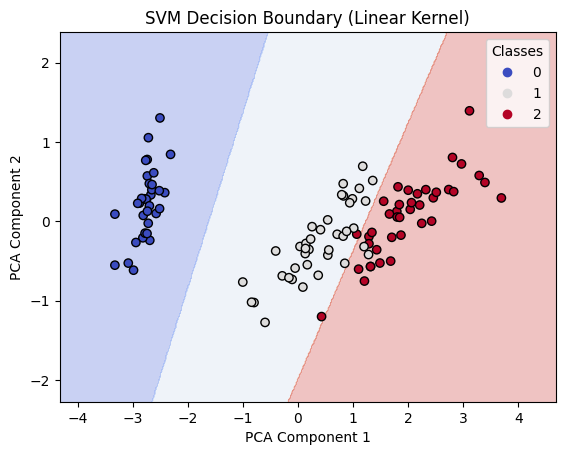

In [157]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train the model again on PCA-transformed data
model_pca = SVC(kernel="linear")
model_pca.fit(x_train_pca, y_train)
print(model_pca.score(x_test_pca,y_test))

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size for mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("SVM Decision Boundary (Linear Kernel)")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(model_pca, x_train_pca, y_train)


0.9210526315789473


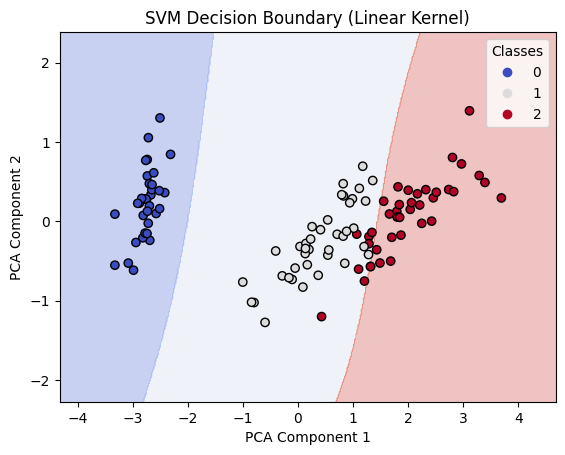

In [158]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train the model again on PCA-transformed data
model_pca = SVC(kernel="poly")
model_pca.fit(x_train_pca, y_train)
print(model_pca.score(x_test_pca,y_test))

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size for mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("SVM Decision Boundary (Linear Kernel)")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(model_pca, x_train_pca, y_train)


0.9210526315789473


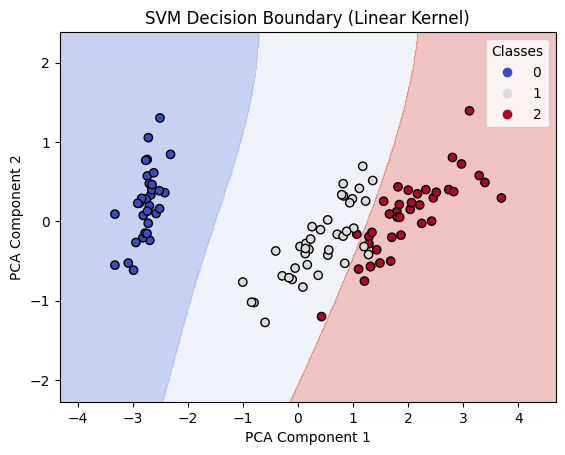

In [159]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train the model again on PCA-transformed data
model_pca = SVC(kernel="rbf")
model_pca.fit(x_train_pca, y_train)
print(model_pca.score(x_test_pca,y_test))

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    h = 0.02  # Step size for mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title("SVM Decision Boundary (Linear Kernel)")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()

plot_decision_boundary(model_pca, x_train_pca, y_train)


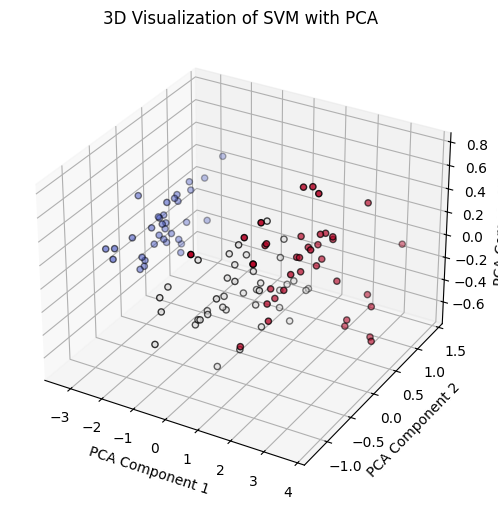

In [160]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3D
pca_3d = PCA(n_components=3)
x_train_pca_3d = pca_3d.fit_transform(x_train)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot of the PCA components
ax.scatter(x_train_pca_3d[:, 0], x_train_pca_3d[:, 1], x_train_pca_3d[:, 2], c=y_train, cmap=plt.cm.coolwarm, edgecolors="k")

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("3D Visualization of SVM with PCA")
plt.show()
